In [330]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [331]:
pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [332]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [333]:
pip install Bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [334]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [335]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

# **Reading the first observations of:
> 1. Train dataset.
> 2. Test dataset.
> 3. Gender submission dataset. 
**

In [336]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [337]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [338]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# *A concise summary of the dataset in different ways.*
*https://www.w3resource.com/pandas/dataframe/dataframe-info.php*

In [339]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [340]:
train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [341]:
train.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 12 entries, PassengerId to Embarked
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [342]:
import io
buffer = io.StringIO()
train.info(buf=buffer)
s = buffer.getvalue()
with open("train.txt", "w",
          encoding="utf-8") as f:  # doctest: +SKIP
     f.write(s)

In [343]:
train.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [344]:
train.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [345]:
train.info(show_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PassengerId  int64  
 1   Survived     int64  
 2   Pclass       int64  
 3   Name         object 
 4   Sex          object 
 5   Age          float64
 6   SibSp        int64  
 7   Parch        int64  
 8   Ticket       object 
 9   Fare         float64
 10  Cabin        object 
 11  Embarked     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Describing the Dataset in different ways**

In [346]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [347]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [348]:
train.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [349]:
train.describe(include=[np.float])

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [350]:
train.describe(include=[np.int])

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [351]:
train.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [352]:
train.describe([.25])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [353]:
train.describe([.25, 0.5])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [354]:
train.describe().mean()

PassengerId    478.044230
Survived       111.733804
Pclass         113.268089
Age            115.596327
SibSp          112.703219
Parch          112.273456
Fare           192.323930
dtype: float64

In [355]:
train.describe().std

<bound method NDFrame._add_numeric_operations.<locals>.std of        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  >

In [356]:
train.describe().value_counts()

PassengerId  Survived    Pclass      Age         SibSp       Parch       Fare      
1.000000     0.000000    1.000000    0.420000    0.000000    0.000000    0.000000      1
223.500000   0.000000    2.000000    20.125000   0.000000    0.000000    7.910400      1
257.353842   0.486592    0.836071    14.526497   1.102743    0.806057    49.693429     1
446.000000   0.000000    3.000000    28.000000   0.000000    0.000000    14.454200     1
             0.383838    2.308642    29.699118   0.523008    0.381594    32.204208     1
668.500000   1.000000    3.000000    38.000000   1.000000    0.000000    31.000000     1
891.000000   1.000000    3.000000    80.000000   8.000000    6.000000    512.329200    1
             891.000000  891.000000  714.000000  891.000000  891.000000  891.000000    1
dtype: int64

# **Different ways to handle the null/NaN data.**

> 1. Visual.
> 2. Arithmetical.




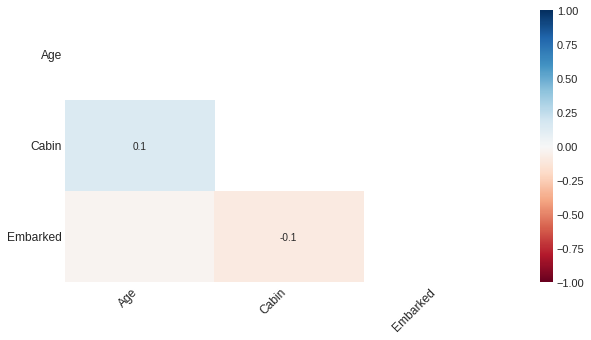

In [357]:
msno.heatmap(train, figsize=(10,5), fontsize=12)

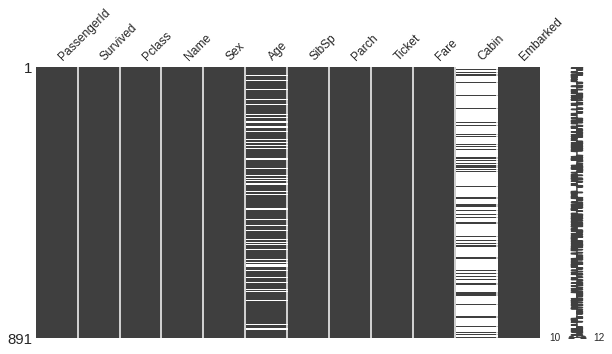

In [358]:
msno.matrix(train, figsize=(10,5), fontsize=12)

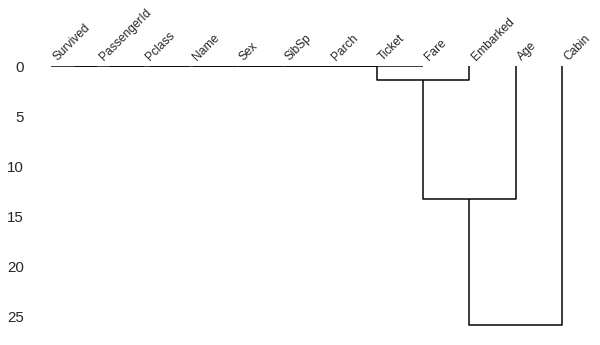

In [359]:
msno.dendrogram(train, figsize=(10,5), fontsize=12)

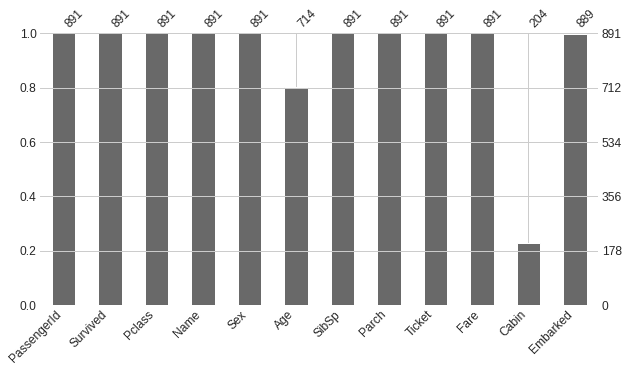

In [360]:
msno.bar(train, figsize=(10,5), fontsize=12)

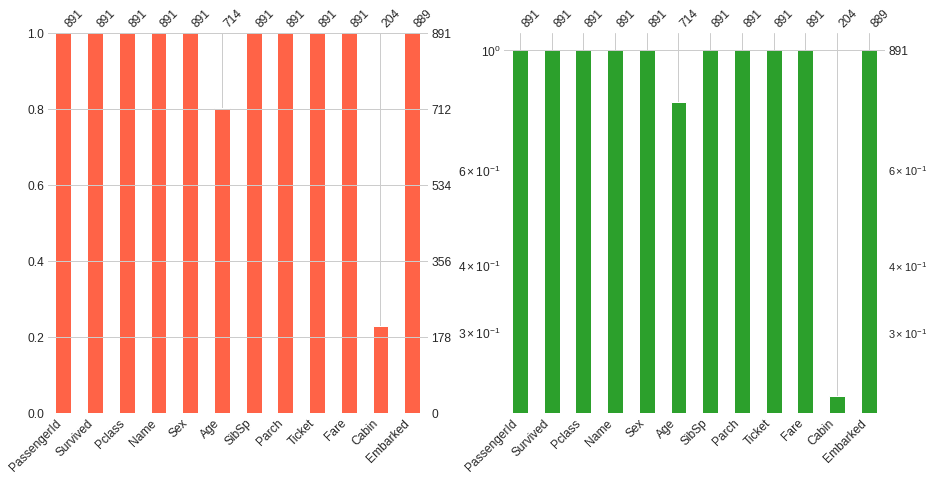

In [361]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
msno.bar(train, color="tomato", fontsize=12, ax=ax1);

ax2 = fig.add_subplot(1,2,2)
msno.bar(train, log=True, color="tab:green", fontsize=12, ax=ax2);

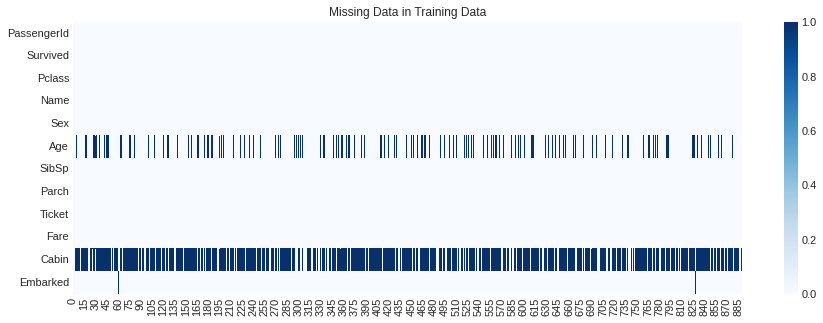

In [362]:
plt.subplots(figsize=(15,5))  
sns.heatmap(train.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in Training Data")
plt.show()

In [363]:
# Determine the null values:
trainNullVals = train.isnull().sum().to_frame()
trainNullVals

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [364]:
train.isnull().sum().sum()

866

In [365]:
trainNullVals = pd.DataFrame(train.isnull().sum())
trainNullVals = trainNullVals.rename(columns = {0:'Null'})

trainNullVals

,Null
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [366]:
trainNullValsPercent = (trainNullVals/ trainNullVals.sum()) * 100
trainNullValsPercent

,Null
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.438799
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [367]:
1#Determining the non-null values:
trainNotNullVals = train.notna().sum().to_frame()
trainNotNullVals = trainNotNullVals.rename(columns = {0:'Not Null'})

trainNotNullVals

,Not Null
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [368]:
trainNotNullVals = (trainNotNullVals/ trainNotNullVals.sum()) * 100
trainNotNullVals

,Not Null
PassengerId,9.067779
Survived,9.067779
Pclass,9.067779
Name,9.067779
Sex,9.067779
Age,7.266436
SibSp,9.067779
Parch,9.067779
Ticket,9.067779
Fare,9.067779


In [369]:
# Combine the dataframes:
trainNullCount = pd.concat([trainNullVals, trainNotNullVals], ignore_index=False, axis=1).reset_index()
trainNullCount = trainNullCount.rename(columns = {'index':'Category'})
trainNullCount

,Category,Null,Not Null
0,PassengerId,0,9.067779
1,Survived,0,9.067779
2,Pclass,0,9.067779
3,Name,0,9.067779
4,Sex,0,9.067779
5,Age,177,7.266436
6,SibSp,0,9.067779
7,Parch,0,9.067779
8,Ticket,0,9.067779
9,Fare,0,9.067779


In [370]:
# Generate plot that compares between the null and not null values.
fig = px.bar(trainNullCount, x="Category", y = ['Not Null', 'Null'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
    title={'text':"Null Values Visualization",
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},
    xaxis_title = "Category",
    yaxis_title = "Count")
fig.update_layout(legend_title_text = 'Status')
fig.show()

# **Handling Missing Data (null data) in our Dataset.**

In [371]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [372]:
"""
axis = 0 >> is used to drop the column with 'NaN' values.
axis = 1 >> is used to drop the row with 'NaN' values.

train.dropna(axis = 0, inplace = True)
train.isnull().sum()
"""

"\naxis = 0 >> is used to drop the column with 'NaN' values.\naxis = 1 >> is used to drop the row with 'NaN' values.\n\ntrain.dropna(axis = 0, inplace = True)\ntrain.isnull().sum()\n"

In [373]:
"""
train.Age = train.Age.fillna(train.Age.mean()) # It can be median too because it is a numerical variable.
train.isnull().sum()

"""

'\ntrain.Age = train.Age.fillna(train.Age.mean()) # It can be median too because it is a numerical variable.\ntrain.isnull().sum()\n\n'

In [374]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [375]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = "median") #It can be any statistical parameter.

In [376]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Describing the given features individually.**
> 1. Survived.
> 2. PassengerId.
> 3. Pclass.
> 4. Name.
> 5. Sex.
> 6. Age.
> 7. SibSp.
> 8. Parch.
> 9. Ticket.
> 10. Fare.
> 11. Cabin.
> 12. Embarked.

\# 1. Name Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [377]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [378]:
train.Name.describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [379]:
train.Name.isnull().sum()

0

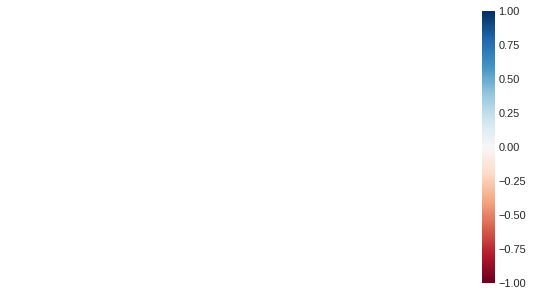

In [380]:
# Viewing null data in your Name column.
msno.heatmap(name_title, figsize=(10,5), fontsize=12)

In [390]:
train["name_title"] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()).to_frame()

train["name_title"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name_title, Length: 891, dtype: object

In [391]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,cabin_multiple
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64


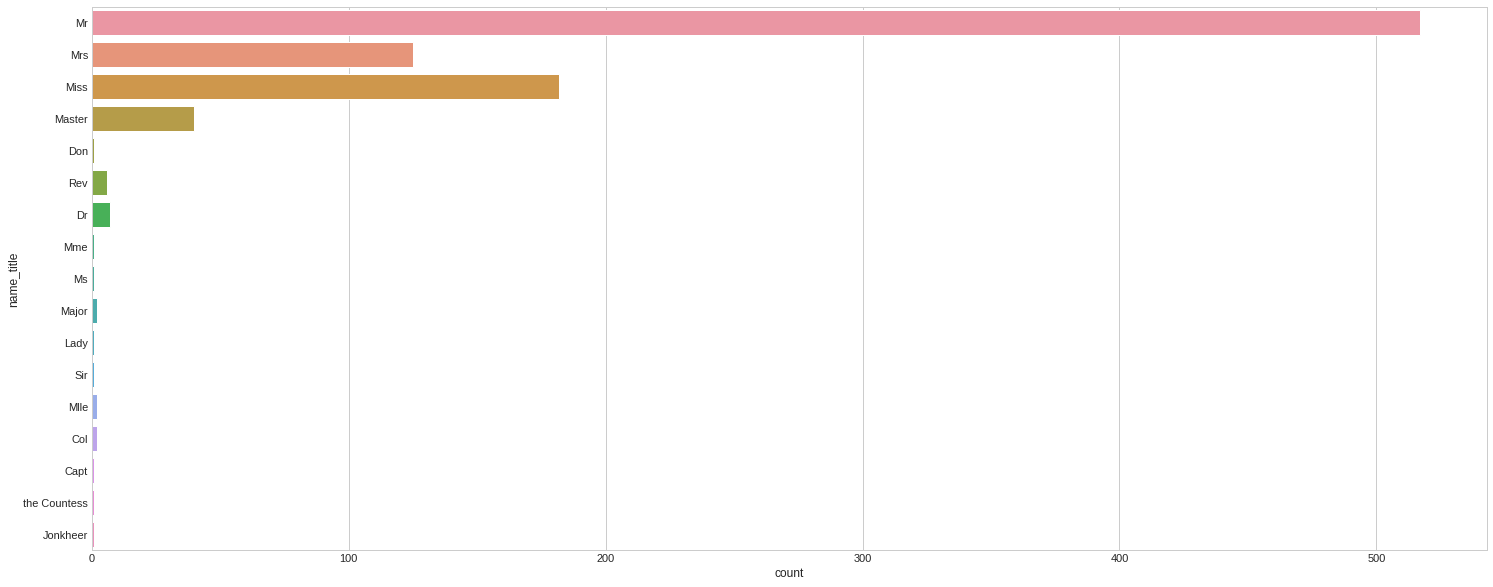

In [392]:
# How many people survived?
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='name_title', data=train);
print(train.name_title.value_counts())

\# 1. Cabin Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [511]:
train.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [512]:
train.Cabin

0                  NaN
1                  C85
2                  NaN
3                 C123
4                  NaN
5                  NaN
6                  E46
7                  NaN
8                  NaN
9                  NaN
10                  G6
11                C103
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 D56
22                 NaN
23                  A6
24                 NaN
25                 NaN
26                 NaN
27         C23 C25 C27
28                 NaN
29                 NaN
30                 NaN
31                 B78
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42                 NaN
43         

In [513]:
train.Cabin.dtypes

dtype('O')

In [514]:
train.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [515]:
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58          

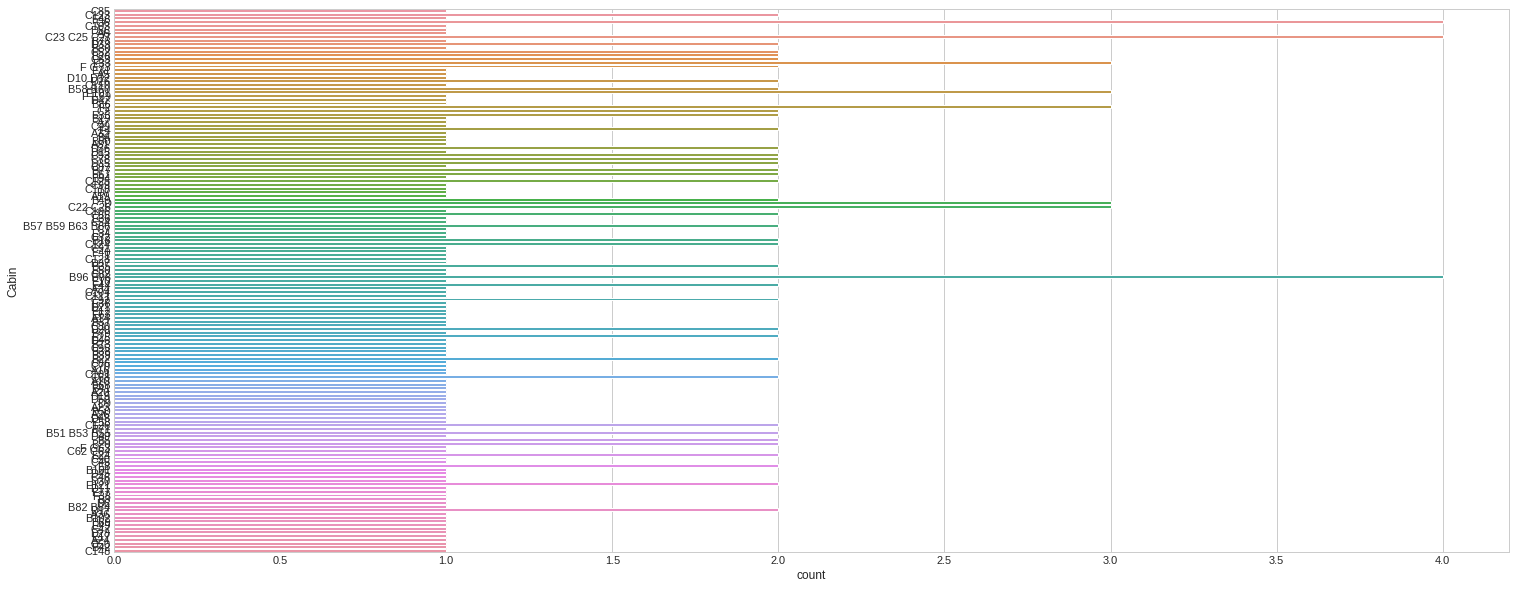

In [516]:
# How many people survived?
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='Cabin', data=train);

In [502]:
CabinNull = train.Cabin.isnull()
CabinNull.head()

0     True
1    False
2     True
3    False
4     True
Name: Cabin, dtype: bool

In [519]:
CabinNullSum = CabinNull.sum()
CabinNullSum

687

In [521]:
CabinTotalLength = len(train.Cabin)
CabinTotalLength

891

In [522]:
CabinNullMean = (CabinNullSum / CabinTotalLength)  * 100
CabinNullMean

77.10437710437711

In [524]:
train["Cabin"].fillna(CabinNullMean, inplace = True)

In [525]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin               0
Embarked            2
name_title          0
cabin_multiple      0
cabin_adv           0
numeric_ticket      0
ticket_letters      0
dtype: int64

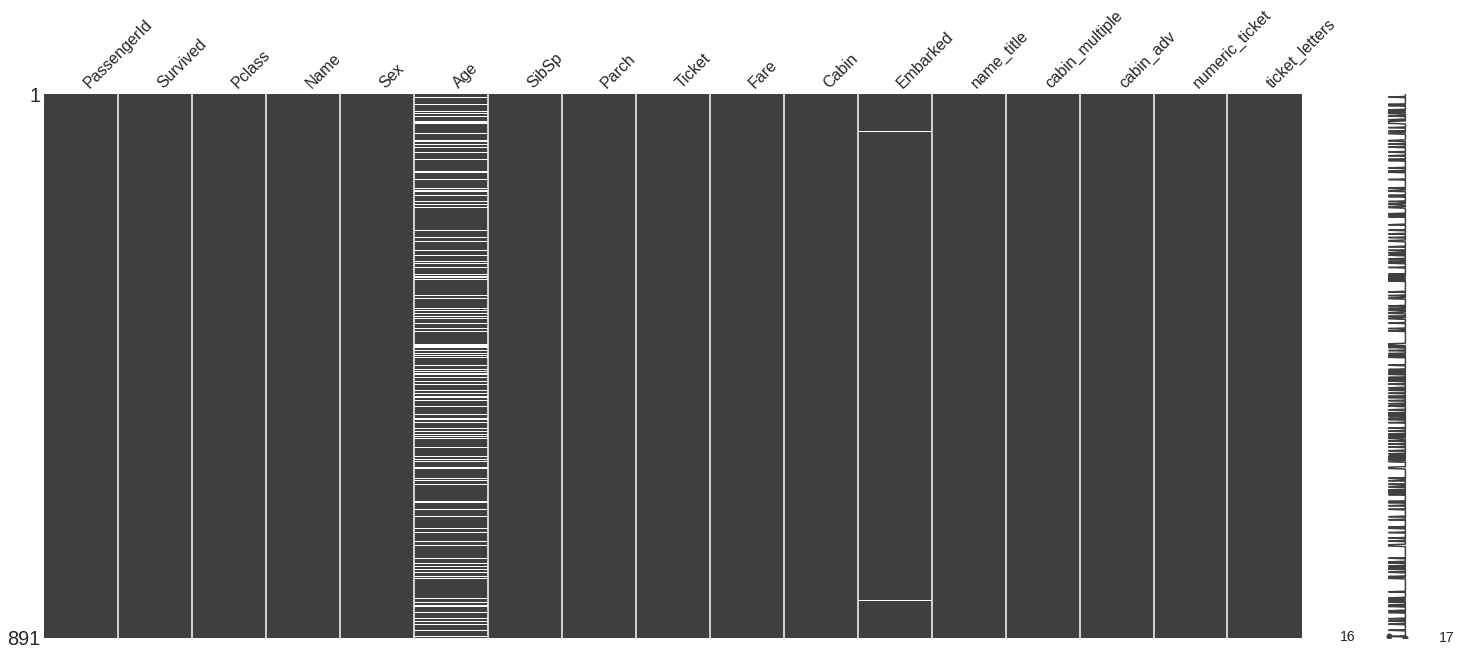

In [529]:
msno.matrix(train)

In [530]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,77.104377,S,Mr,0,n,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,77.104377,S,Miss,0,n,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,77.104377,S,Mr,0,n,1,0


**Splitting the Cabin feature into:**
> 1. Numeric = Cabin Multiple.
> 2. Letters = Cabin Adv.

In [402]:
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

In [403]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,cabin_multiple,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,n


In [407]:
train.cabin_multiple.head()

0    0
1    1
2    0
3    1
4    0
Name: cabin_multiple, dtype: int64

In [408]:
train.cabin_adv.head()

0    n
1    C
2    n
3    C
4    n
Name: cabin_adv, dtype: object

In [409]:
train.cabin_multiple.unique()

array([0, 1, 3, 2, 4])

In [410]:
train.cabin_adv.unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [414]:
train.cabin_multiple.dtypes

dtype('int64')

In [422]:
train.cabin_multiple.describe()

count    891.000000
mean       0.267116
std        0.547134
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: cabin_multiple, dtype: float64

In [415]:
train.cabin_adv.dtypes

dtype('O')

In [453]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [454]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_adv', values = 'Ticket', aggfunc ='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64


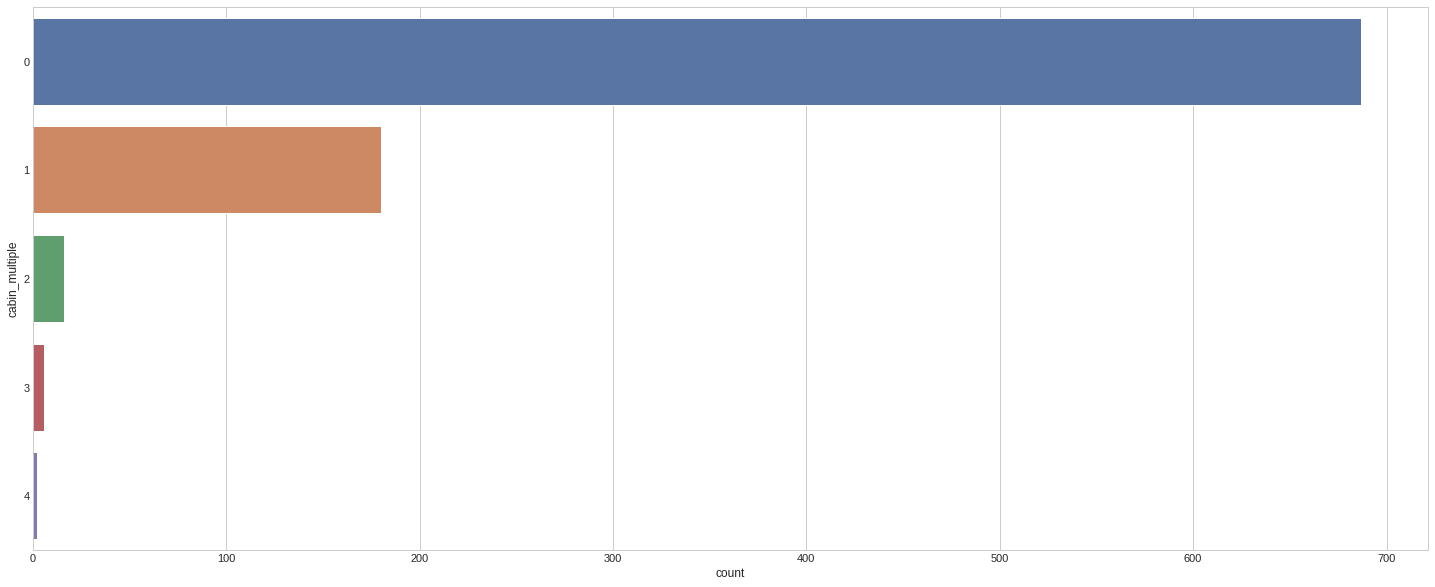

In [404]:
# How many people survived?
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='cabin_multiple', data=train);
print(train.cabin_multiple.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


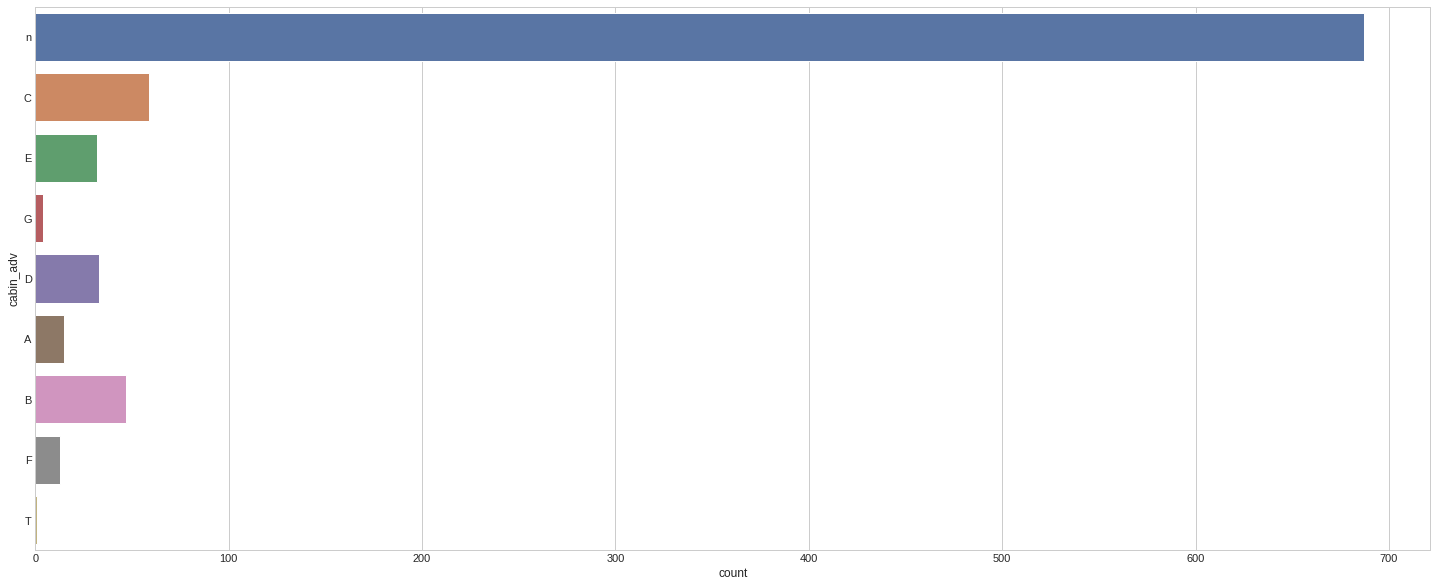

In [405]:
# How many people survived?
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='cabin_adv', data=train);
print(train.cabin_adv.value_counts())

In [531]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_adv', values = 'Ticket', aggfunc ='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [532]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [418]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,cabin_multiple,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,n


\# 1. The Ticket Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [533]:
"""
#understand ticket values better 
#numeric vs non numeric 

train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

train['numeric_ticket'].value_counts()

#lets us view all rows in dataframe through scrolling. This is for convenience 

pd.set_option("max_rows", None)

train['ticket_letters'].value_counts()

"""

'\n#understand ticket values better \n#numeric vs non numeric \n\ntrain[\'numeric_ticket\'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)\n\ntrain[\'ticket_letters\'] = train.Ticket.apply(lambda x: \'\'.join(x.split(\' \')[:-1]).replace(\'.\',\'\').replace(\'/\',\'\').lower() if len(x.split(\' \')[:-1]) > 0 else 0)\n\ntrain[\'numeric_ticket\'].value_counts()\n\n#lets us view all rows in dataframe through scrolling. This is for convenience \n\npd.set_option("max_rows", None)\n\ntrain[\'ticket_letters\'].value_counts()\n\n'

In [534]:
train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [535]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [536]:
train.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [537]:
train.Ticket.dtype

dtype('O')

In [538]:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [539]:
train.numeric_ticket.unique()

array([0, 1])

In [540]:
#lets us view all rows in dataframe through scrolling. This is for convenience 
pd.set_option("max_rows", None)
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [541]:
train.ticket_letters.unique()

array(['a5', 'pc', 'stono2', 0, 'pp', 'ca', 'scparis', 'sca4', 'a4', 'sp',
       'soc', 'wc', 'sotonoq', 'wep', 'c', 'sop', 'fa', 'fcc', 'swpp',
       'scow', 'ppp', 'sc', 'scah', 'as', 'scahbasle', 'sopp', 'fc',
       'sotono2', 'casoton'], dtype=object)

In [542]:
pd.set_option("max_rows", None)
train.ticket_letters.value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [545]:
pd.pivot_table(train, index = 'Survived', columns = 'ticket_letters', values = 'Ticket', aggfunc ='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [547]:
pd.pivot_table(train, index = 'Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc ='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


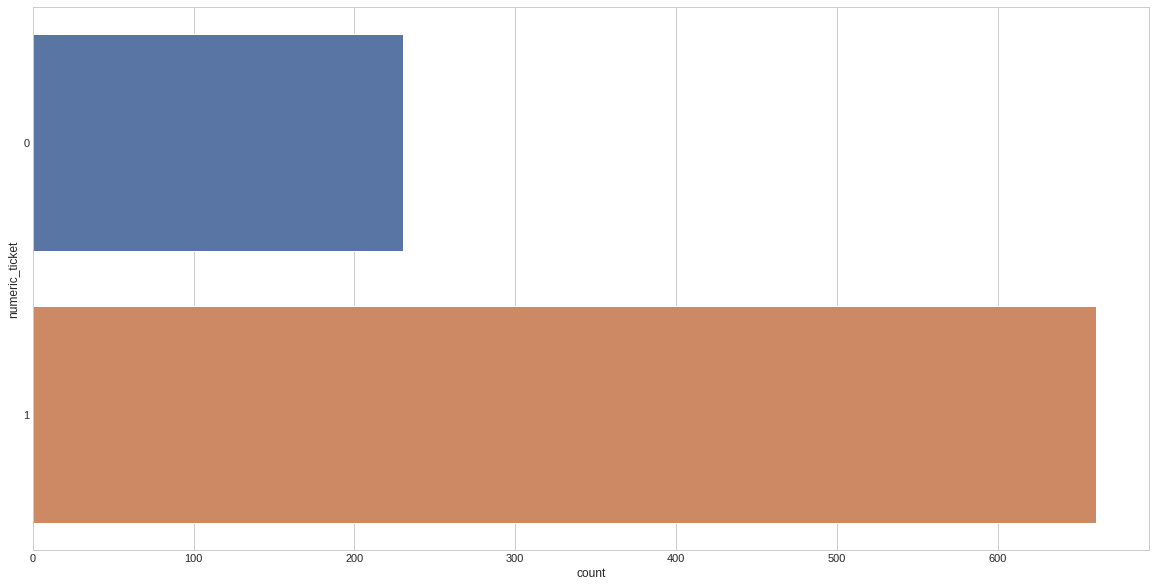

In [543]:
# How many people survived?
fig = plt.figure(figsize=(20, 10))
sns.countplot(y='numeric_ticket', data=train);

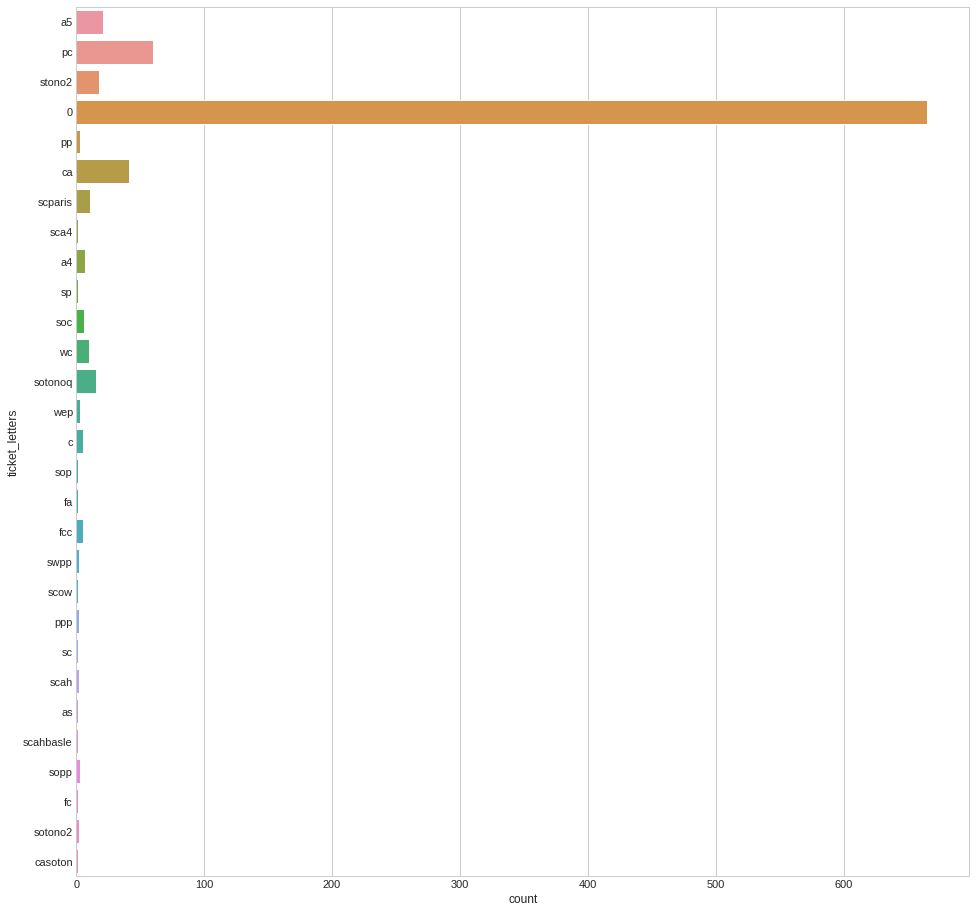

In [544]:
# How many people survived?
fig = plt.figure(figsize=(16, 16))
sns.countplot(y='ticket_letters', data=train);

In [548]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,77.104377,S,Mr,0,n,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,77.104377,S,Miss,0,n,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,77.104377,S,Mr,0,n,1,0
